## In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [4]:
series = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv", header=0, parse_dates=True, index_col='Month')
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
series.dropna(axis=0,inplace=True)

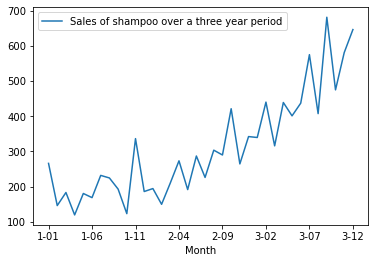

In [7]:
series.plot()
pyplot.show()

In [8]:
X= series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [9]:
size = int(len(X)*0.6)
print(len(X),'\n',size)

36 
 21


In [10]:
train,test=X[0:size],X[size:len(X)]

In [11]:
history=[x for x in train]
predictions=[]
for t in range(len(test)):
    model =ARIMA(history,order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print("Predicted = {}    Excepted = {}".format(yhat,obs))
    
error = mean_squared_error(test,predictions)
print("\n\n\nTest MSE = {}".format(round(error,ndigits=3)))

Predicted = [272.96451422]    Excepted = [421.6]
Predicted = [290.31366212]    Excepted = [264.5]
Predicted = [349.11764194]    Excepted = [342.3]
Predicted = [306.51293429]    Excepted = [339.7]
Predicted = [387.37635503]    Excepted = [440.4]
Predicted = [348.15422407]    Excepted = [315.9]
Predicted = [386.30873564]    Excepted = [439.3]
Predicted = [356.08213522]    Excepted = [401.3]
Predicted = [446.37949922]    Excepted = [437.4]
Predicted = [394.73731958]    Excepted = [575.5]
Predicted = [434.9155186]    Excepted = [407.6]
Predicted = [507.92333692]    Excepted = [682.]
Predicted = [435.48297593]    Excepted = [475.3]
Predicted = [652.74379393]    Excepted = [581.3]
Predicted = [546.34341033]    Excepted = [646.9]



Test MSE = 7547.808


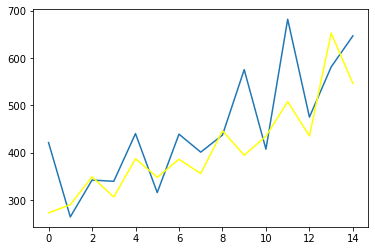

In [12]:
pyplot.plot(test)
pyplot.plot(predictions,color='yellow')
pyplot.show()